### **Imports the libraries**

In [1]:
# وارد کردن کتابخونه به برنامه
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
# پاک کردن متغیر ها که حافظه را درگیر نکنند
import gc
# فهمیدن ورژن پانداس
import os
#
import warnings
warnings.filterwarnings('ignore')

print(pd.__version__)


2.3.2


### **Trick 01 - نحوه بررسی مصرف حافظه (Memory Usage) در Pandas**

In [2]:
dft01 = pd.read_csv("../../00 DATA/Churn_Modelling.csv")
dft01.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dft01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dft01.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 2.4 MB


In [5]:
# فهمیدن اینکه هر کدوم از ستون ها چقدر از حافظه را مصرف میکنه

dft01.memory_usage(deep=True)

Index                 132
RowNumber           80000
CustomerId          80000
Surname            554349
CreditScore         80000
Geography          550032
Gender             539086
Age                 80000
Tenure              80000
Balance             80000
NumOfProducts       80000
HasCrCard           80000
IsActiveMember      80000
EstimatedSalary     80000
Exited              80000
dtype: int64

In [6]:

del dft01
gc.collect()

76

### **Trick 02 - نحوه تبدیل داده های گسسته (Convert) در Pandas**


In [7]:
dft02 = pd.read_csv("../../00 DATA/titanic.csv")
dft02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [8]:
dft02.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
dft02.sex.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: sex
Non-Null Count  Dtype 
--------------  ----- 
1309 non-null   object
dtypes: object(1)
memory usage: 10.4+ KB


#### a) کانورت دستی

In [10]:
# میخایم نوع دیتا تایپ رو به عدد تغیر بدیم چون اینجا اپجکت هست
dft02['sex num'] = dft02.sex.map({'male':0, 'female':1})
dft02.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex num
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


#### b)  کانورت خودکار

In [11]:
dft02.embarked.info(), dft02.embarked.head()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: embarked
Non-Null Count  Dtype 
--------------  ----- 
1307 non-null   object
dtypes: object(1)
memory usage: 10.4+ KB


(None,
 0    S
 1    S
 2    S
 3    S
 4    S
 Name: embarked, dtype: object)

In [12]:
# این دستور با استفاده از تابع فکتورایز به صورت خودکار مقدار دهی میکنه برای وقتی که بیش تر از دو پارامتر داریم خوبه
dft02['embarked num'] = dft02.embarked.factorize()[0]


dft02.embarked.head(20)


0     S
1     S
2     S
3     S
4     S
5     S
6     S
7     S
8     S
9     C
10    C
11    C
12    C
13    S
14    S
15    S
16    C
17    C
18    C
19    C
Name: embarked, dtype: object

In [13]:
dft02['embarked num'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    0
14    0
15    0
16    1
17    1
18    1
19    1
Name: embarked num, dtype: int64

In [14]:
# فهمیدن ترتیب دیتا
dft02.embarked.factorize()[1]

Index(['S', 'C', 'Q'], dtype='object')

#### c) روش سوم

In [15]:
# حالت باینری برای وقتاییی که میخایم صرفا یه جواب صفر یا یک داشته باشیم
# ستون sibsp یا ۰ هست یا ۱ یا ۲ ولی ما میخایم فقط ببینیم وجود داره یا نه (پس ۱ با ۲ بودن فرقی نداره)
dft02['sibsp'].head(40)

0     0
1     1
2     1
3     1
4     1
5     0
6     1
7     0
8     2
9     0
10    1
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    1
21    1
22    0
23    0
24    0
25    0
26    1
27    1
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
Name: sibsp, dtype: int64

In [16]:
dft02['sibsp_binary'] = (dft02['sibsp'] > 0).astype(int)
dft02['sibsp_binary'].head(20)

0     0
1     1
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     0
10    1
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: sibsp_binary, dtype: int64

In [17]:

del dft02
gc.collect()

12

### **Trick 03 - نحوه تبدیل داده های پیوسته (Convert) در Pandas**

In [18]:
dft03 = pd.read_csv("../../00 DATA/titanic.csv")
dft03.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### a)  روش دستی

In [19]:
# برای وقتی که درک از دیتا داریم
pd.cut(dft03.age , bins = [0,18,25,99], labels = ["child","young","old"]).head(20)

0       old
1     child
2     child
3       old
4     young
5       old
6       old
7       old
8       old
9       old
10      old
11    child
12    young
13      old
14      old
15      NaN
16    young
17      old
18      old
19      old
Name: age, dtype: category
Categories (3, object): ['child' < 'young' < 'old']

#### b) برای وقتی که درکی از دیتا نداریم

In [20]:
# p برای اینکه بگیم به چند بخش تقسیم کن
# تابع value_counts() این مقدار رو بهم ما نشون میده
pd.qcut(dft03['age'], q = 3).value_counts()
dft03.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [21]:

del dft03
gc.collect()

12

### **Trick 04 - نحوه تغییر نمایش (Display Option) در Pandas**

In [22]:
dft04 = pd.read_csv("../../00 DATA/titanic.csv")
dft04.fare


0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: fare, Length: 1309, dtype: float64

#### a) تنظیم رقم اعشار

In [23]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [24]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
dft04.fare
# دقت کنید این کار روی کل پانداس اعمال میشه نه دیتا فریم


0      211.3
1      151.6
2      151.6
3      151.6
4      151.6
        ... 
1304    14.5
1305    14.5
1306     7.2
1307     7.2
1308     7.9
Name: fare, Length: 1309, dtype: float64

#### b) برای ریست کردن

In [25]:
pd.reset_option('display.float_format')
dft04.fare

0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: fare, Length: 1309, dtype: float64

In [26]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
print(dft04.fare)
pd.reset_option('display.float_format')
print(dft04.fare)

0      211.3
1      151.6
2      151.6
3      151.6
4      151.6
        ... 
1304    14.5
1305    14.5
1306     7.2
1307     7.2
1308     7.9
Name: fare, Length: 1309, dtype: float64
0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: fare, Length: 1309, dtype: float64


In [27]:

del dft04
gc.collect()

12

### **Trick 05 - نحوه تغییر استایل (Styling) در Pandas**

In [28]:
import warnings
warnings.filterwarnings('ignore')
# این کار باعث میشه فایل نهایی شامل وارنینگ ها نباشه که از نظر بصری خروجی بهتری داشته باشیم


In [29]:
dft05 = pd.read_csv("../../00 DATA/stocks.csv")
dft05.head()
#(dft05.style.background_gradient(cmap='RdYlGn'))

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT


**DATA Frame Styling**

In [30]:
formatter = {'Close': '${:.2f}', 'Volume': '{:,}'}
# یک علامت دلار قبل کلوسر میاد و تا دورقم اعشار نمایش داده میشه
# , به طور خودکار سه رقم سه رقم جدا میشه


#### a) حالت اول

In [31]:
dft05.columns

Index(['Date', 'Close', 'Volume', 'Symbol'], dtype='object')

In [32]:
dft05.style.format(formatter)

,Date,Close,Volume,Symbol
0,2016-10-03,$31.50,"14,070,500",CSCO
1,2016-10-03,$112.52,"21,701,800",AAPL
2,2016-10-03,$57.42,"19,189,500",MSFT
3,2016-10-04,$113.00,"29,736,800",AAPL
4,2016-10-04,$57.24,"20,085,900",MSFT
5,2016-10-04,$31.35,"18,460,400",CSCO
6,2016-10-05,$57.64,"16,726,400",MSFT
7,2016-10-05,$31.59,"11,808,600",CSCO
8,2016-10-05,$113.05,"21,453,100",AAPL


#### b) حالت دوم

In [33]:
(dft05.style.format(formatter)
  # به بخش axis='index' بیشتر دقت داشته باش
 .hide(axis='index')
 .highlight_min('Close', color='red')
 .highlight_max('Close', color='lightgreen')
)

Date,Close,Volume,Symbol
2016-10-03,$31.50,"14,070,500",CSCO
2016-10-03,$112.52,"21,701,800",AAPL
2016-10-03,$57.42,"19,189,500",MSFT
2016-10-04,$113.00,"29,736,800",AAPL
2016-10-04,$57.24,"20,085,900",MSFT
2016-10-04,$31.35,"18,460,400",CSCO
2016-10-05,$57.64,"16,726,400",MSFT
2016-10-05,$31.59,"11,808,600",CSCO
2016-10-05,$113.05,"21,453,100",AAPL


#### c) حالت سوم


In [34]:
(dft05.style.format(formatter)
 .hide(axis='index')
 .background_gradient(subset = 'Volume',cmap='PuBu'))

Date,Close,Volume,Symbol
2016-10-03,$31.50,"14,070,500",CSCO
2016-10-03,$112.52,"21,701,800",AAPL
2016-10-03,$57.42,"19,189,500",MSFT
2016-10-04,$113.00,"29,736,800",AAPL
2016-10-04,$57.24,"20,085,900",MSFT
2016-10-04,$31.35,"18,460,400",CSCO
2016-10-05,$57.64,"16,726,400",MSFT
2016-10-05,$31.59,"11,808,600",CSCO
2016-10-05,$113.05,"21,453,100",AAPL


#### d) حالت چهارم

In [35]:
(dft05.style.format(formatter)
 .hide(axis='index')
 .bar('Volume')
 )

Date,Close,Volume,Symbol
2016-10-03,$31.50,"14,070,500",CSCO
2016-10-03,$112.52,"21,701,800",AAPL
2016-10-03,$57.42,"19,189,500",MSFT
2016-10-04,$113.00,"29,736,800",AAPL
2016-10-04,$57.24,"20,085,900",MSFT
2016-10-04,$31.35,"18,460,400",CSCO
2016-10-05,$57.64,"16,726,400",MSFT
2016-10-05,$31.59,"11,808,600",CSCO
2016-10-05,$113.05,"21,453,100",AAPL


In [36]:
(dft05.style.format(formatter)
 .hide(axis='index')
 .bar('Volume', color='lightblue')
 )

Date,Close,Volume,Symbol
2016-10-03,$31.50,"14,070,500",CSCO
2016-10-03,$112.52,"21,701,800",AAPL
2016-10-03,$57.42,"19,189,500",MSFT
2016-10-04,$113.00,"29,736,800",AAPL
2016-10-04,$57.24,"20,085,900",MSFT
2016-10-04,$31.35,"18,460,400",CSCO
2016-10-05,$57.64,"16,726,400",MSFT
2016-10-05,$31.59,"11,808,600",CSCO
2016-10-05,$113.05,"21,453,100",AAPL


In [37]:
(dft05.style.format(formatter)
 .hide(axis='index')
 .bar('Volume', color='lightblue', align='left') # default
 )

Date,Close,Volume,Symbol
2016-10-03,$31.50,"14,070,500",CSCO
2016-10-03,$112.52,"21,701,800",AAPL
2016-10-03,$57.42,"19,189,500",MSFT
2016-10-04,$113.00,"29,736,800",AAPL
2016-10-04,$57.24,"20,085,900",MSFT
2016-10-04,$31.35,"18,460,400",CSCO
2016-10-05,$57.64,"16,726,400",MSFT
2016-10-05,$31.59,"11,808,600",CSCO
2016-10-05,$113.05,"21,453,100",AAPL


In [38]:
(dft05.style.format(formatter)
 .hide(axis='index')
 .bar('Volume', color='lightblue', align='right')
 )

Date,Close,Volume,Symbol
2016-10-03,$31.50,"14,070,500",CSCO
2016-10-03,$112.52,"21,701,800",AAPL
2016-10-03,$57.42,"19,189,500",MSFT
2016-10-04,$113.00,"29,736,800",AAPL
2016-10-04,$57.24,"20,085,900",MSFT
2016-10-04,$31.35,"18,460,400",CSCO
2016-10-05,$57.64,"16,726,400",MSFT
2016-10-05,$31.59,"11,808,600",CSCO
2016-10-05,$113.05,"21,453,100",AAPL


In [39]:
(dft05.style.format(formatter)
 .hide(axis='index')
 .bar('Volume', color='lightblue', align='zero')
 .set_caption('Volume from 2008')
 )

Date,Close,Volume,Symbol
2016-10-03,$31.50,"14,070,500",CSCO
2016-10-03,$112.52,"21,701,800",AAPL
2016-10-03,$57.42,"19,189,500",MSFT
2016-10-04,$113.00,"29,736,800",AAPL
2016-10-04,$57.24,"20,085,900",MSFT
2016-10-04,$31.35,"18,460,400",CSCO
2016-10-05,$57.64,"16,726,400",MSFT
2016-10-05,$31.59,"11,808,600",CSCO
2016-10-05,$113.05,"21,453,100",AAPL


In [40]:

del dft05, formatter
gc.collect()

238

### **~~Trick 06 - آشنایی با Pandas Profiling در Pandas~~ (UNUSED)**


### **Trick 07- نحوه تغییر نام ستون ها در Pandas**

In [41]:
dft07 = pd.DataFrame(np.random.randn(10,5))
print(dft07)

          0         1         2         3         4
0 -0.597300  0.762963 -1.484425 -1.696751 -1.523066
1  1.252085 -1.580546 -1.112285  1.563286  0.326650
2 -0.203361  1.030766  0.827361 -1.570714 -0.386240
3  0.404872  1.151027 -0.102996 -0.777582  1.705721
4 -0.793422  0.806196  0.060385 -0.609849 -0.259149
5 -0.991043 -0.993638 -1.059103 -1.086997 -0.014859
6 -0.180724 -0.910357  0.520040 -0.871959 -1.118566
7 -1.509002  1.611856  1.500627  0.502402  0.277319
8 -1.135579 -0.823121 -0.769615  0.673729 -0.759363
9  1.344453  0.900516 -0.666204 -1.538310  0.777170


In [42]:
dft07 = pd.DataFrame(np.random.randn(10,5), columns=['A', 'B', 'C', 'D','F'])
# or dft07 = pd.DataFrame(np.random.randn(10,5), columns=list('ABCDF'))
dft07

,A,B,C,D,F
0,2.200583,0.256079,-0.326642,0.569558,-0.407372
1,0.670894,-0.465208,1.952255,2.408384,0.097234
2,-0.595799,-0.512758,3.349532,0.802844,-0.944269
3,-0.653431,0.855182,-0.126869,1.063262,0.213159
4,0.778716,-1.606237,0.985583,0.652088,-0.520698
5,-0.378333,-0.392907,0.989722,0.186826,-1.130871
6,-0.864474,-0.188754,0.330064,-0.122888,-0.048173
7,-0.256596,-1.850964,0.525630,1.825053,0.676088
8,0.185848,-1.143277,-0.738438,0.270026,-1.769206
9,1.987819,-2.484720,1.071736,1.561192,-1.551591


**Another Solution**

In [43]:
dft07 = pd.DataFrame({'ستون یک': [10,20],'ستون دو': [20,30]})
dft07


,ستون یک,ستون دو
0,10,20
1,20,30


#### a) روش اول

In [44]:
dft07 = dft07.rename({'ستون یک' : 'columns1', 'ستون دو' : 'columns2'}, axis='columns')
dft07

,columns1,columns2
0,10,20
1,20,30


#### b) روش دوم

In [45]:
dft07.columns = ['colu_1','colu_2']
dft07

,colu_1,colu_2
0,10,20
1,20,30


#### c)  **STR Replace**

In [46]:
dft07.columns = dft07.columns.str.replace('_',' ')
dft07

,colu 1,colu 2
0,10,20
1,20,30


In [47]:
dft07.columns = dft07.columns.str.replace('colu','column')
dft07

,column 1,column 2
0,10,20
1,20,30


#### d) اضافه کردن به اول و اخر اسم ها

In [48]:
dft07.add_prefix('x_')

,x_column 1,x_column 2
0,10,20
1,20,30


In [49]:
dft07.add_suffix('_y')

,column 1_y,column 2_y
0,10,20
1,20,30


save changes

In [50]:
dft07 = dft07.add_prefix('x_')
dft07 = dft07.add_suffix('_Y')
print(dft07)

   x_column 1_Y  x_column 2_Y
0            10            20
1            20            30


In [51]:
del dft07
gc.collect()

30

### **Trick 08 - نحوه تشخیص برابر بودن ستون ها در Pandas**

In [52]:
dft08 = pd.DataFrame({'First' : [12,24,44,np.nan], 'Sec' : [12,24,44,np.nan]})
dft08


,First,Sec
0,12.0,12.0
1,24.0,24.0
2,44.0,44.0
3,NaN,NaN


In [53]:
# دو ستون عملا مساوی هستن ولی دو nan هیچوقت مساوی نخواهند بود
np.nan == np.nan

False

#### a)

In [54]:
dft08.First.equals(dft08.Sec)

True

#### b)

In [55]:
dft08_new = dft08.copy()
dft08_new.equals(dft08)

True

In [56]:

del dft08, dft08_new
gc.collect()

12

### **Trick 09 - نحوه استفاده از تابع Query در Pandas**

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
dft09 = pd.read_csv("../../00 DATA/stocks.csv")
dft09.head()

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT


#### a) سلکت کردن با کوئری

a) روش معمولی

In [59]:
dft09[dft09.Symbol == 'AAPL']

,Date,Close,Volume,Symbol
1,2016-10-03,112.52,21701800,AAPL
3,2016-10-04,113.00,29736800,AAPL
8,2016-10-05,113.05,21453100,AAPL


b) روش استفاده از کوئری

In [60]:
dft09.query('Symbol == "AAPL" ')

,Date,Close,Volume,Symbol
1,2016-10-03,112.52,21701800,AAPL
3,2016-10-04,113.00,29736800,AAPL
8,2016-10-05,113.05,21453100,AAPL


#### b) عملیات منتطقی با کوئری


a) روش معمولی

In [61]:
dft09.groupby("Symbol").mean('Volume','Close')

,Close,Volume
Symbol,,
AAPL,112.856667,2.429723e+07
CSCO,31.480000,1.477983e+07
MSFT,57.433333,1.866727e+07


In [62]:
temp = dft09.groupby("Symbol").mean('Volume','Close')
temp = temp[temp['Close'] < 100]
temp

,Close,Volume
Symbol,,
CSCO,31.480000,1.477983e+07
MSFT,57.433333,1.866727e+07


b) استفاده از کوئری

In [63]:
temp = dft09.groupby("Symbol").mean('Volume','Close').query('Close<100')
temp

,Close,Volume
Symbol,,
CSCO,31.480000,1.477983e+07
MSFT,57.433333,1.866727e+07


In [64]:

del dft09, temp
gc.collect()

12

### **Trick 10 - نحوه جداسازی داده های یک دیتافریم به ستون های مختلف در Pandas**

In [65]:
dft10 = pd.DataFrame({'name' : ['Pooria Lari','Ali Adibi','Reza moradifarahani'],'loc' : ['tehran','lavason','tabriz']})
dft10

,name,loc
0,Pooria Lari,tehran
1,Ali Adibi,lavason
2,Reza moradifarahani,tabriz


In [66]:
dft10[['First Name', 'Last Name']] = dft10.name.str.split(' ', expand=True)
#dft10.drop(columns=['name'], inplace=True)
dft10

,name,loc,First Name,Last Name
0,Pooria Lari,tehran,Pooria,Lari
1,Ali Adibi,lavason,Ali,Adibi
2,Reza moradifarahani,tabriz,Reza,moradifarahani


Alternative Solution

In [67]:

dft10['First Name'], dft10['Last Name'] = dft10.name.str.split(' ', expand=True)
#dft10.drop(columns=['First Name', 'Last Name'], inplace=True)
dft10


,name,loc,First Name,Last Name
0,Pooria Lari,tehran,0,1
1,Ali Adibi,lavason,0,1
2,Reza moradifarahani,tabriz,0,1


In [68]:

del dft10
gc.collect()

25

### **Trick 11 - نحوه انتخاب ستون های بر اساس تایپ داده ها در Pandas**

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
dft11 = pd.read_csv("../../00 DATA/Churn_Modelling.csv")
dft11.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
dft11.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#### a) include data


In [72]:
# میخام فقط ستون هایی که عددی هستن رو انتخاب کنم
#dft11.select_dtypes(include= 'number').head()
# روش بهتر
dft11.select_dtypes(include=[np.number]).head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [73]:
dft11.select_dtypes(include= 'object').head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [74]:
dft11.select_dtypes(include= 'float').head()

,Balance,EstimatedSalary
0,0.00,101348.88
1,83807.86,112542.58
2,159660.80,113931.57
3,0.00,93826.63
4,125510.82,79084.10


In [75]:
dft11.select_dtypes(include= 'int').head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,619,42,2,1,1,1,1
1,2,15647311,608,41,1,1,0,1,0
2,3,15619304,502,42,8,3,1,0,1
3,4,15701354,699,39,1,2,0,0,0
4,5,15737888,850,43,2,1,1,1,0


In [76]:
dft11.select_dtypes(include= 'int64').head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,619,42,2,1,1,1,1
1,2,15647311,608,41,1,1,0,1,0
2,3,15619304,502,42,8,3,1,0,1
3,4,15701354,699,39,1,2,0,0,0
4,5,15737888,850,43,2,1,1,1,0


#### b) exclude data

In [77]:
# حالا میخام همه دیتا ها رو داشته باشم جز دیتای عددی
dft11.select_dtypes(exclude= 'number').head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [78]:
dft11.select_dtypes(exclude= ['int','object']).head()

,Balance,EstimatedSalary
0,0.00,101348.88
1,83807.86,112542.58
2,159660.80,113931.57
3,0.00,93826.63
4,125510.82,79084.10


In [79]:
dft11.select_dtypes(exclude= ['float','object']).head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,619,42,2,1,1,1,1
1,2,15647311,608,41,1,1,0,1,0
2,3,15619304,502,42,8,3,1,0,1
3,4,15701354,699,39,1,2,0,0,0
4,5,15737888,850,43,2,1,1,1,0


In [80]:

del dft11
gc.collect()

12

### **Trick 12 - نحوه تبدیل داده‌ها به عدد در Pandas**

In [81]:
dft12 = pd.DataFrame(
 {
     'col1' : ['1.2','34.2','23.1'],
     'col2' : ['12.1','10','4.5'],
     'col3' : ['6.7','2.3','7.8']
 }
)
dft12

,col1,col2,col3
0,1.2,12.1,6.7
1,34.2,10,2.3
2,23.1,4.5,7.8


In [82]:
dft12.dtypes

col1    object
col2    object
col3    object
dtype: object

#### a)

In [83]:
dft12_convert = dft12.astype(
 {
     'col1' : 'float64',
     'col2' : 'float64',
 }
)
dft12_convert.dtypes

col1    float64
col2    float64
col3     object
dtype: object

#### b)

In [84]:
dft12_convert['col3'] = pd.to_numeric(dft12.col3, errors='coerce').fillna(0)
"""
fillna(N)
         fill not num to N

errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then invalid parsing will raise an exception.
        - If 'coerce', then invalid parsing will be set as NaN.
        - If 'ignore', then invalid parsing will return the input.
"""
dft12_convert.dtypes

col1    float64
col2    float64
col3    float64
dtype: object

#### c)

In [85]:
dft12.dtypes

col1    object
col2    object
col3    object
dtype: object

In [86]:
dft12_convert = dft12.apply(pd.to_numeric, errors='coerce').fillna(0)
dft12_convert.dtypes

col1    float64
col2    float64
col3    float64
dtype: object

In [87]:
dft12_convert

,col1,col2,col3
0,1.2,12.1,6.7
1,34.2,10.0,2.3
2,23.1,4.5,7.8


In [88]:

del dft12, dft12_convert
gc.collect()

12

### **Trick 13 - ساخت یک دیتافریم از چندین فایل CSV در Pandas**

In [89]:
pd.read_csv('../../00 DATA/Churn_Modelling_1.csv')



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [90]:

pd.read_csv('../../00 DATA/Churn_Modelling_2.csv')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
1,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
2,13,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0
3,14,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0
4,15,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0
5,16,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0
6,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
7,18,15788218,Henderson,549,Spain,Female,24,9,0.00,2,1,1,14406.41,0
8,19,15661507,Muldrow,587,Spain,Male,45,6,0.00,1,0,0,158684.81,0
9,20,15568982,Hao,726,France,Female,24,6,0.00,2,1,1,54724.03,0


In [91]:

pd.read_csv('../../00 DATA/Churn_Modelling_3.csv')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,21,15577657,McDonald,732,France,Male,41,8,0.00,2,1,1,170886.17,0
1,22,15597945,Dellucci,636,Spain,Female,32,8,0.00,2,1,0,138555.46,0
2,23,15699309,Gerasimov,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1
3,24,15725737,Mosman,669,France,Male,46,3,0.00,2,0,1,8487.75,0
4,25,15625047,Yen,846,France,Female,38,5,0.00,1,1,1,187616.16,0
5,26,15738191,Maclean,577,France,Male,25,3,0.00,2,0,1,124508.29,0
6,27,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0
7,28,15700772,Nebechi,571,France,Male,44,9,0.00,2,0,0,38433.35,0
8,29,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0
9,30,15656300,Lucciano,411,France,Male,29,0,59697.17,2,1,1,53483.21,0


In [92]:
#import glob
from glob import glob

In [93]:
#churn_full_files = glob.glob('../../00 DATA/Churn_Modelling_*.csv')
#hurn_full_files = sorted(churn_full_files)
churn_full_files = sorted(glob('../../00 DATA/Churn_Modelling_*.csv'))
churn_full_files

['../../00 DATA\\Churn_Modelling_1.csv',
 '../../00 DATA\\Churn_Modelling_2.csv',
 '../../00 DATA\\Churn_Modelling_3.csv']

In [94]:
dft13 = churn_full_files
dft13

# این کار غلطه

['../../00 DATA\\Churn_Modelling_1.csv',
 '../../00 DATA\\Churn_Modelling_2.csv',
 '../../00 DATA\\Churn_Modelling_3.csv']

In [95]:

dft13 = pd.concat((pd.read_csv(file) for file in churn_full_files))
dft13


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


fix index

In [96]:

dft13 = pd.concat((pd.read_csv(file) for file in churn_full_files), ignore_index=True)
dft13

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [97]:

del dft13, churn_full_files
gc.collect()

12

### **Trick 14 - نحوه فیلتر نمودن دیتافریم بر اساس محتوا در Pandas**

In [98]:
dft14 = pd.read_csv('../../00 DATA/Churn_Modelling.csv')
dft14

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [99]:
# sample () برای انتخاب رندوم یک یا چند ستون
dft14.sample()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2134,2135,15610355,Hunter,713,France,Male,44,1,63438.91,1,1,0,64375.4,0


In [100]:
# بفهمیم مشتری ها از چه کشورایی هستن
dft14.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [101]:
# بفهمیم تعداد مشتری ها در هر کشو چه قدر هست

dft14.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

#### a) روش اول

In [102]:
dft14[(dft14['Geography']=='France') | (dft14['Geography']=='Spain')]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [103]:
# این کد کار نمیکنه
#dft14[(dft14['Geography']=='France') & (dft14['Gender'] == 'male') ].sample(10)

#### b) روش دوم

In [104]:
dft14[dft14.Geography.isin(['France','Spain'])]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


#### c) روش سوم به کمک نات کردن

In [105]:
dft14[~dft14.Geography.isin(['Germany'])]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [106]:

del dft14
gc.collect()

12

### **Trick 15 - کار با Date Range برای تولید داده‌های زمانی در Pandas**

In [107]:
import warnings
warnings.filterwarnings('ignore')

#### a) DATA Range doc

In [108]:
#Creating a simple date range
pd.date_range(start='2022-11-15', end='2022-11-21')

DatetimeIndex(['2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18',
               '2022-11-19', '2022-11-20', '2022-11-21'],
              dtype='datetime64[ns]', freq='D')

In [109]:
#Creating a date range in 6 minute intervals
pd.date_range(start='2023-01-01 00:00:00', end='2023-01-01 00:24:00', freq='6T')

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 00:06:00',
               '2023-01-01 00:12:00', '2023-01-01 00:18:00',
               '2023-01-01 00:24:00'],
              dtype='datetime64[ns]', freq='6min')

In [110]:
#Weekly 'W' - Cutting your date range into weeks
pd.date_range(start='2023-01-01', end='2023-03-10', freq='W')

DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05'],
              dtype='datetime64[ns]', freq='W-SUN')

In [111]:
#Creating a date range with 10 periods
pd.date_range(start='2020-01-01 00:00:00', end='2020-01-01 00:24:00', periods=10)

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:02:40',
               '2020-01-01 00:05:20', '2020-01-01 00:08:00',
               '2020-01-01 00:10:40', '2020-01-01 00:13:20',
               '2020-01-01 00:16:00', '2020-01-01 00:18:40',
               '2020-01-01 00:21:20', '2020-01-01 00:24:00'],
              dtype='datetime64[ns]', freq=None)

In [112]:
#Quarters 'Q' - Splitting your date range by quarters
pd.date_range(start='2023-01-01', end='2023-12-01', freq='Q')

DatetimeIndex(['2023-03-31', '2023-06-30', '2023-09-30'], dtype='datetime64[ns]', freq='QE-DEC')

In [113]:
#Every 5 Months '5M' - Don't forget your can put a integer in front of your freq to expand the frequency
pd.date_range(start='2023-01-01', end='2024-12-01', freq='5M')

DatetimeIndex(['2023-01-31', '2023-06-30', '2023-11-30', '2024-04-30',
               '2024-09-30'],
              dtype='datetime64[ns]', freq='5ME')

#### ~~b) Example~~

### **Trick 16 - کار با داده‌های زمانی (Datetime) در Pandas**

In [114]:
import warnings
warnings.filterwarnings('ignore')

**DateTime in Pandas**

* The date-time default format is “YYYY-MM-DD”. Hence, November 15th, 2022, in the date format will be presented as “2022-11-15”. The datetime format can be changed and by changing we mean changing the sequence and style of the format.

Where, format is a string representing the type of required date format.

* For year %y
* For month %m
* For day %d

In [115]:
date_sr = pd.Series(pd.date_range('2022-11-15', periods=3, freq='D', tz='Asia/Tehran'))
print(date_sr.dtype)
print(date_sr)

datetime64[ns, Asia/Tehran]
0   2022-11-15 00:00:00+03:30
1   2022-11-16 00:00:00+03:30
2   2022-11-17 00:00:00+03:30
dtype: datetime64[ns, Asia/Tehran]


In [116]:
# نام دادن به ایندکس ها
list1 = ['day 1','day 2','day 3']

# set index
date_sr.index = list1
print(date_sr.dtype)
print(date_sr)

datetime64[ns, Asia/Tehran]
day 1   2022-11-15 00:00:00+03:30
day 2   2022-11-16 00:00:00+03:30
day 3   2022-11-17 00:00:00+03:30
dtype: datetime64[ns, Asia/Tehran]


In [117]:
change_format = date_sr.dt.strftime('%d,%m,%Y')
print(change_format)

day 1    15,11,2022
day 2    16,11,2022
day 3    17,11,2022
dtype: object


In [118]:
change_format = date_sr.dt.strftime('%d/%m/%Y')
print(change_format)

day 1    15/11/2022
day 2    16/11/2022
day 3    17/11/2022
dtype: object


b)

In [119]:
date_sr = pd.to_datetime(pd.Series('2022-11-15'))
print(date_sr)
change_format = date_sr.dt.strftime('%d/%m/%Y')
print(change_format)

0   2022-11-15
dtype: datetime64[ns]
0    15/11/2022
dtype: object


c)

In [120]:
date_sr = pd.to_datetime(pd.Series("2022-11-15"))
change_format = date_sr.dt.strftime('%d-%m-%Y')

print(change_format)

0    15-11-2022
dtype: object


d)

In [121]:
dft16 = pd.DataFrame({
    'data' : ['3/10/2022', '3/11/2022', '3/12/2022'],
    'value': [100, 200, 300]
})
dft16

,data,value
0,3/10/2022,100
1,3/11/2022,200
2,3/12/2022,300


In [122]:
dft16['data'] = pd.to_datetime(dft16['data'])
dft16
# هدف کلی این بود که جنس داده رو به دیتا تایپ تبدیل کنیم

,data,value
0,2022-03-10,100
1,2022-03-11,200
2,2022-03-12,300


In [123]:
# برای اینکه روز اول بیاد
dft16['data'] = pd.to_datetime(dft16['data'], dayfirst=True)
dft16

,data,value
0,2022-03-10,100
1,2022-03-11,200
2,2022-03-12,300


e)

In [124]:
dft16 = pd.DataFrame({'date': ['2022-6-10 20:30:0',
                            '2022-7-1 19:45:30',
                            '2022-10-12 4:5:1'],
                      'value': [100, 200, 300]})
dft16['date'] = pd.to_datetime(dft16['date'], format="%Y-%d-%m %H:%M:%S")
dft16

,date,value
0,2022-10-06 20:30:00,100
1,2022-01-07 19:45:30,200
2,2022-12-10 04:05:01,300


f) ساخت یک دیتا فریم با استفاده از ستون های جدا

In [125]:
dft16 = pd.DataFrame({'year': [2022, 2023],
                   'month': [2, 3],
                   'day': [4, 5]})
dft16['data'] = pd.to_datetime(dft16)
dft16

,year,month,day,data
0,2022,2,4,2022-02-04
1,2023,3,5,2023-03-05


g) گرفتن جدا جدای سال ماه و روز

In [126]:
dft16 = pd.DataFrame({'name': ['Soheil', 'Mahtab', 'Baran'],
                      'DoB': ['10-09-1989', '06-28-2020', '06-28-2022']})

dft16['DoB'] = pd.to_datetime(dft16['DoB'])
dft16

,name,DoB
0,Soheil,1989-10-09
1,Mahtab,2020-06-28
2,Baran,2022-06-28


In [127]:
dft16['day'] = dft16['DoB'].dt.day
dft16['month'] = dft16['DoB'].dt.month
dft16['year'] = dft16['DoB'].dt.year
dft16['weekday'] = dft16['DoB'].dt.weekday
dft16['day_of_week'] = dft16['DoB'].dt.dayofweek
dft16['is_leap_year'] = dft16['DoB'].dt.is_leap_year
dft16['hour'] = dft16['DoB'].dt.hour
dft16['minute'] = dft16['DoB'].dt.minute
dft16['second'] = dft16['DoB'].dt.second
dft16

,name,DoB,day,month,year,weekday,day_of_week,is_leap_year,hour,minute,second
0,Soheil,1989-10-09,9,10,1989,0,0,False,0,0,0
1,Mahtab,2020-06-28,28,6,2020,6,6,True,0,0,0
2,Baran,2022-06-28,28,6,2022,1,1,False,0,0,0


mapping

In [128]:
dw_mapping={
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}
dft16['day_of_week']=dft16['DoB'].dt.weekday.map(dw_mapping)
dft16

,name,DoB,day,month,year,weekday,day_of_week,is_leap_year,hour,minute,second
0,Soheil,1989-10-09,9,10,1989,0,Saturday,False,0,0,0
1,Mahtab,2020-06-28,28,6,2020,6,Friday,True,0,0,0
2,Baran,2022-06-28,28,6,2022,1,Sunday,False,0,0,0


In [129]:
dw_mapping={
     0: 'شنبه',
    1: 'یکشنبه',
    2: 'دوشنبه',
    3: 'سه شنبه',
    4: 'چهارشنبه',
    5: 'پنجشنبه',
    6: 'جمعه',
}
dft16['day_of_week']=dft16['DoB'].dt.weekday.map(dw_mapping)
dft16

,name,DoB,day,month,year,weekday,day_of_week,is_leap_year,hour,minute,second
0,Soheil,1989-10-09,9,10,1989,0,شنبه,False,0,0,0
1,Mahtab,2020-06-28,28,6,2020,6,جمعه,True,0,0,0
2,Baran,2022-06-28,28,6,2022,1,یکشنبه,False,0,0,0


h) محاسبه تولد

In [130]:
today = pd.to_datetime('today')
dft16['age'] = today.year - dft16['DoB'].dt.year
dft16

,name,DoB,day,month,year,weekday,day_of_week,is_leap_year,hour,minute,second,age
0,Soheil,1989-10-09,9,10,1989,0,شنبه,False,0,0,0,36
1,Mahtab,2020-06-28,28,6,2020,6,جمعه,True,0,0,0,5
2,Baran,2022-06-28,28,6,2022,1,یکشنبه,False,0,0,0,3


In [131]:
"""# Year difference
today = pd.to_datetime('today')
diff_y = today.year - df['DoB'].dt.year

# Haven't had birthday
b_md = df['DoB'].apply(lambda x: (x.month,x.day) )
no_birthday = b_md > (today.month,today.day)
df['age'] = diff_y - no_birthday
df"""

"# Year difference\ntoday = pd.to_datetime('today')\ndiff_y = today.year - df['DoB'].dt.year\n\n# Haven't had birthday\nb_md = df['DoB'].apply(lambda x: (x.month,x.day) )\nno_birthday = b_md > (today.month,today.day)\ndf['age'] = diff_y - no_birthday\ndf"

In [132]:

del dft16, today, date_sr, list1,dw_mapping, change_format
gc.collect()

68

### Trick 17 - کار با داده های زمانی شمسی ( Jalali Datetime) در Pandas

In [133]:
 #pip install jalali-pandas

In [134]:
import jalali_pandas
import warnings
warnings.filterwarnings('ignore')

In [135]:
dft17 = pd.DataFrame({'data' : pd.date_range(start='2022-11-15', periods=10, freq='D')})
dft17

,data
0,2022-11-15
1,2022-11-16
2,2022-11-17
3,2022-11-18
4,2022-11-19
5,2022-11-20
6,2022-11-21
7,2022-11-22
8,2022-11-23
9,2022-11-24


#### a) میلادی به شمسی

In [136]:
# تبدیل تاریخ به شمسی

dft17['shamsi_data'] = dft17['data'].jalali.to_jalali()
dft17


,data,shamsi_data
0,2022-11-15,1401-08-24 00:00:00
1,2022-11-16,1401-08-25 00:00:00
2,2022-11-17,1401-08-26 00:00:00
3,2022-11-18,1401-08-27 00:00:00
4,2022-11-19,1401-08-28 00:00:00
5,2022-11-20,1401-08-29 00:00:00
6,2022-11-21,1401-08-30 00:00:00
7,2022-11-22,1401-09-01 00:00:00
8,2022-11-23,1401-09-02 00:00:00
9,2022-11-24,1401-09-03 00:00:00


#### b) شمسی به میلادی

In [137]:
dft17['miladi_data'] = dft17['shamsi_data'].jalali.to_gregorian()
dft17

,data,shamsi_data,miladi_data
0,2022-11-15,1401-08-24 00:00:00,2022-11-15
1,2022-11-16,1401-08-25 00:00:00,2022-11-16
2,2022-11-17,1401-08-26 00:00:00,2022-11-17
3,2022-11-18,1401-08-27 00:00:00,2022-11-18
4,2022-11-19,1401-08-28 00:00:00,2022-11-19
5,2022-11-20,1401-08-29 00:00:00,2022-11-20
6,2022-11-21,1401-08-30 00:00:00,2022-11-21
7,2022-11-22,1401-09-01 00:00:00,2022-11-22
8,2022-11-23,1401-09-02 00:00:00,2022-11-23
9,2022-11-24,1401-09-03 00:00:00,2022-11-24


#### c) تجزیه

In [138]:
dft17 = pd.DataFrame({"date": ["1401/08/24", "1401/08/25", "1401/08/26"]})
dft17["jdate"] = dft17["date"].jalali.parse_jalali("%Y/%m/%d")
dft17

,date,jdate
0,1401/08/24,1401-08-24 00:00:00
1,1401/08/25,1401-08-25 00:00:00
2,1401/08/26,1401-08-26 00:00:00


In [139]:
dft17['year'] = dft17["jdate"].jalali.year
dft17['month'] = dft17["jdate"].jalali.month
dft17['quarter'] = dft17["jdate"].jalali.quarter
dft17['day'] = dft17["jdate"].jalali.day
dft17['weekday'] = dft17["jdate"].jalali.weekday
dft17

,date,jdate,year,month,quarter,day,weekday
0,1401/08/24,1401-08-24 00:00:00,1401,8,3,24,3
1,1401/08/25,1401-08-25 00:00:00,1401,8,3,25,4
2,1401/08/26,1401-08-26 00:00:00,1401,8,3,26,5


In [140]:

del dft17
gc.collect()

12

### Trick 18 - کاربرد دستور Explode در Pandas

In [141]:
import warnings
warnings.filterwarnings('ignore')

In [142]:
dic18 = {"Team":["FC Barcelona", "FC Real Madrid"],
    "Players":[["Ter Stegen", "Semedo", "Piqué", "Lenglet", "Alba", "Rakitic", "De Jong", "Sergi Roberto", "Messi", "Suárez", "Griezmann"],
               ["Courtois", "Carvajal", "Varane", "Sergio Ramos", "Mendy", "Kroos", "Valverde", "Casemiro", "Isco", "Benzema", "Bale"]]}


In [143]:
dft18 = pd.DataFrame(dic18)
dft18

,Team,Players
0,FC Barcelona,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
1,FC Real Madrid,"[Courtois, Carvajal, Varane, Sergio Ramos, Men..."


In [144]:
tempDF = dft18.explode('Players')
tempDF

,Team,Players
0,FC Barcelona,Ter Stegen
0,FC Barcelona,Semedo
0,FC Barcelona,Piqué
0,FC Barcelona,Lenglet
0,FC Barcelona,Alba
0,FC Barcelona,Rakitic
0,FC Barcelona,De Jong
0,FC Barcelona,Sergi Roberto
0,FC Barcelona,Messi
0,FC Barcelona,Suárez


inclode

In [145]:
tempDF['imp'] = tempDF.groupby(tempDF.index)["Players"].agg(list)

tempDF

,Team,Players,imp
0,FC Barcelona,Ter Stegen,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
0,FC Barcelona,Semedo,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
0,FC Barcelona,Piqué,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
0,FC Barcelona,Lenglet,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
0,FC Barcelona,Alba,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
0,FC Barcelona,Rakitic,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
0,FC Barcelona,De Jong,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
0,FC Barcelona,Sergi Roberto,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
0,FC Barcelona,Messi,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
0,FC Barcelona,Suárez,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."


In [146]:

del dft18, tempDF,dic18
gc.collect()

12

### Trick 19 - نحوه کار با CategoricalDtype در Pandas

In [147]:
'''
Categoryهایی که مانند دبستان، راهنمایی و دبیرستان ترتیب دارند را می توانیم در کتابخانه Pandas تحلیل کنیم به گونه ای که به عنوان مثال پس از Sort نمودن داده ها این ترتیب قابل تشخیص باشد.
'''
from pandas.api.types import CategoricalDtype

In [148]:
dic19 = {"ID":[100, 200, 300, 400], "quality":["bad", "very good", "good", "excellent"]}
dft19 = pd.DataFrame(dic19)
dft19.head()

,ID,quality
0,100,bad
1,200,very good
2,300,good
3,400,excellent


In [149]:
cat_type = CategoricalDtype(["bad", "good", "very good", "excellent"], ordered=True)
# دستور ordered اشاره به این داره که داریم به ترتیب داده دادیم و انرا به عنوان یک لیست با ترتیب در نظر بگیر
cat_type

CategoricalDtype(categories=['bad', 'good', 'very good', 'excellent'], ordered=True, categories_dtype=object)

In [150]:
dft19['quality'] =dft19.quality.astype(cat_type)
dft19.head()

,ID,quality
0,100,bad
1,200,very good
2,300,good
3,400,excellent


In [151]:
dft19 = dft19.sort_values('quality', ascending = False)
# ascending بر اساس نزوری و صعودی بودن
dft19

,ID,quality
3,400,excellent
1,200,very good
2,300,good
0,100,bad


In [152]:
dft19[dft19['quality'] > 'good'].head()


,ID,quality
3,400,excellent
1,200,very good


In [153]:
del dft19, cat_type, dic19
gc.collect()

12

### Tirck 20 - کاربرد Diff در Pandas

In [154]:
import warnings
warnings.filterwarnings('ignore')

In [155]:
# فرض کنید میزان تفاضل ها رو میخاهیم

a) ساخت یک دیتا فریم که رندوم باشه

In [156]:
def genarate_data():
    rows = 11
    n_cols = 6
    cols = list("abcdef")
    dft20 = pd.DataFrame(np.random.randint(1,10,size = (rows,n_cols)), columns=cols)
    #dft20.index = pd.util.testing.makeIntIndex(rows)
    return dft20

In [157]:
dft20 = genarate_data()
dft20

,a,b,c,d,e,f
0,1,8,4,7,7,3
1,3,7,6,4,3,9
2,1,8,7,1,3,9
3,1,2,9,4,4,5
4,7,8,9,6,6,8
5,6,9,1,7,8,7
6,8,3,7,7,7,3
7,3,2,2,8,7,7
8,7,7,6,1,7,2
9,8,3,7,6,5,5


In [158]:
dft20['a_diff'] = dft20.a.diff()
dft20

,a,b,c,d,e,f,a_diff
0,1,8,4,7,7,3,NaN
1,3,7,6,4,3,9,2.0
2,1,8,7,1,3,9,-2.0
3,1,2,9,4,4,5,0.0
4,7,8,9,6,6,8,6.0
5,6,9,1,7,8,7,-1.0
6,8,3,7,7,7,3,2.0
7,3,2,2,8,7,7,-5.0
8,7,7,6,1,7,2,4.0
9,8,3,7,6,5,5,1.0


In [159]:
dft20 = genarate_data()
dft20['a_diff'] = dft20.a.diff()
dft20['b_diff'] = dft20.b.diff()
dft20['c_diff'] = dft20.c.diff()
dft20['d_diff'] = dft20.d.diff()
dft20['e_diff'] = dft20.e.diff()
dft20['f_diff'] = dft20.f.diff()
dft20

,a,b,c,d,e,f,a_diff,b_diff,c_diff,d_diff,e_diff,f_diff
0,6,3,1,8,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4,9,6,9,1,-4.0,1.0,8.0,-2.0,8.0,0.0
2,2,6,8,7,3,7,0.0,2.0,-1.0,1.0,-6.0,6.0
3,9,6,6,6,1,7,7.0,0.0,-2.0,-1.0,-2.0,0.0
4,2,2,1,8,2,5,-7.0,-4.0,-5.0,2.0,1.0,-2.0
5,6,7,3,8,1,7,4.0,5.0,2.0,0.0,-1.0,2.0
6,5,6,6,2,5,9,-1.0,-1.0,3.0,-6.0,4.0,2.0
7,1,1,2,3,2,9,-4.0,-5.0,-4.0,1.0,-3.0,0.0
8,9,6,3,4,5,4,8.0,5.0,1.0,1.0,3.0,-5.0
9,9,4,3,2,8,1,0.0,-2.0,0.0,-2.0,3.0,-3.0


In [160]:
del dft20
gc.collect()

12

### Trick 21 - شناسایی منبع اصلی داده ها در دیتافریم در Pandas

In [161]:
# میخاهیم بفهمیم هر کدوم از دیتا فریم ها از کجا امده

In [162]:
#import os
#برای اینکه فایل رو سیو و بخانیم و دسترسی سیستم عاملی نیاز داریم

In [163]:
def genarate_data():
    rows = 11
    n_cols = 6
    cols = list("abcdef")
    dft21t = pd.DataFrame(np.random.randint(1,10,size = (rows,n_cols)), columns=cols)
    #dft21.index = pd.util.testing.makeIntIndex(rows)
    return dft21t

In [164]:
dft21_1 = genarate_data()
dft21_2 = genarate_data()
dft21_3 = genarate_data()

In [165]:
dft21_1.head()

,a,b,c,d,e,f
0,2,9,2,6,6,1
1,4,8,2,3,8,3
2,9,2,9,1,2,3
3,4,4,7,2,6,2
4,1,1,4,9,8,5


In [166]:
dft21_2.head()

,a,b,c,d,e,f
0,8,4,4,4,2,2
1,3,9,2,3,5,9
2,3,8,9,9,7,6
3,7,7,6,7,9,4
4,1,3,1,7,4,1


In [167]:
dft21_3.head()

,a,b,c,d,e,f
0,9,8,6,9,5,4
1,1,8,1,9,4,7
2,2,2,1,4,3,2
3,6,8,1,6,9,8
4,4,4,2,7,9,7


a) گرفتن خروجی csv

In [168]:
dft21_1.to_csv("dft21_1.csv")
dft21_2.to_csv("dft21_2.csv")
dft21_3.to_csv("dft21_3.csv")

b) فهمیدن اینکه فایل این  نوتبوک کجا ذخیره شده

In [169]:
pwd

'E:\\ML\\MLproj002\\Pooria\\01 Preprocessing\\Pandas'

In [170]:
listFile = []

#for _,_, files in os.walk('E:\\ML\\MLproj002\\Pooria\\01 Preprocessing\\Pandas'):
for _,_, files in os.walk("."):
    for f in files:
        if "dft21" in f:
            listFile.append(f)
listFile

['dft21_1.csv', 'dft21_2.csv', 'dft21_3.csv']

c) فهمیدن اینکه بفهمی از کدوم فایل خونده شده

In [171]:
dft21 = pd.concat((pd.read_csv(file).assign(filename = file) for file in listFile), ignore_index = True)
dft21.sample(10)

,Unnamed: 0,a,b,c,d,e,f,filename
23,1,1,8,1,9,4,7,dft21_3.csv
12,1,3,9,2,3,5,9,dft21_2.csv
28,6,9,9,4,9,8,1,dft21_3.csv
13,2,3,8,9,9,7,6,dft21_2.csv
21,10,4,9,5,7,7,8,dft21_2.csv
2,2,9,2,9,1,2,3,dft21_1.csv
1,1,4,8,2,3,8,3,dft21_1.csv
24,2,2,2,1,4,3,2,dft21_3.csv
27,5,1,7,8,8,4,5,dft21_3.csv
11,0,8,4,4,4,2,2,dft21_2.csv


In [172]:
del dft21,dft21_1,dft21_2,dft21_3, listFile
gc.collect()

12

### Trick 22 - نحوه جابجایی ستون‌ها در Pandas

In [173]:
dic22 = {
    "A":[15, 20],
    "B":[20, 25],
    "C":[30 ,40],
    "D":[50, 60]
}
dft22 = pd.DataFrame(dic22)
dft22.head()


,A,B,C,D
0,15,20,30,50
1,20,25,40,60


#### a) روش اول

In [174]:
dft22.insert(3,'c2', dic22['C'])
dft22.insert(1,'a2', dft22['A']*2)
dft22.head()

,A,a2,B,C,c2,D
0,15,30,20,30,30,50
1,20,40,25,40,40,60


#### b) روش دوم

In [175]:
dft22['c3'] = dft22['C']*20

columList = dft22.columns.tolist()

location = 5

columList = columList[:location] + ['c3'] + columList[location: -1]

dft22 = dft22[columList]
dft22.head()

,A,a2,B,C,c2,c3,D
0,15,30,20,30,30,600,50
1,20,40,25,40,40,800,60


In [176]:
del dft22,columList,location,dic22
gc.collect()

12

### Trick 23 - نحوه Save نمودن دیتافریم در قالب یک فایل csv در Pandas

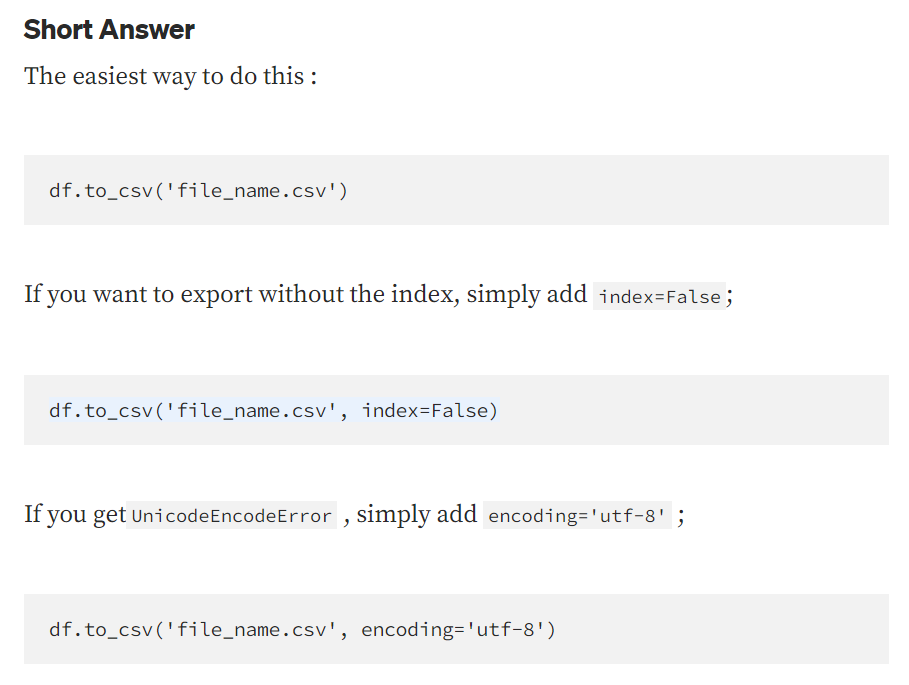

In [177]:
dic23_1 = {
            'Name': ['a','b','c','d'],
            'Score': [100,200,300,0.005]
          }
dft23 = pd.DataFrame(dic23_1)
dft23.head()

,Name,Score
0,a,100.000
1,b,200.000
2,c,300.000
3,d,0.005


In [178]:
dft23.to_csv("dft23_1.csv")
#dft23.to_csv("E:\\ML\\MLproj002\\Pooria\\01 Preprocessing\\Pandas\\dft23.csv")

In [179]:
dft23.to_csv("dft23_2.csv", sep= '\t')

In [180]:
dft23.to_csv("dft23_3.csv", float_format='%.2f')

In [181]:
dft23.to_csv("dft23_4.csv", header=False)
dft23.to_csv("dft23_5.csv", header=False, index=False)

In [182]:
dic23_2 = {
            'Name': ['ستون چهارم','ستون سوم','ستون دوم','ستون اول'],
            'Score': [100,200,300,0.005]
          }
dft23 = pd.DataFrame(dic23_2)
dft23.head()

,Name,Score
0,ستون چهارم,100.000
1,ستون سوم,200.000
2,ستون دوم,300.000
3,ستون اول,0.005


In [183]:
dft23.to_csv("dft23_6.csv")
dft23.to_csv("dft23_7.csv", encoding='utf-8')
dft23.to_csv("dft23_8.csv", encoding='utf-8', index=False, header=False)

In [184]:
del dic23_1, dic23_2, dft23
gc.collect()

12

### Trick 24 - کاربرد Groupby در Pandas

In [185]:
dft24 = pd.read_csv('../../00 DATA/employee.csv')
dft24.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [186]:
dft24[['Age','DailyRate','Department']].groupby(['Department']).head()

,Age,DailyRate,Department
0,41,1102,Sales
1,49,279,Research & Development
2,37,1373,Research & Development
3,33,1392,Research & Development
4,27,591,Research & Development
5,32,1005,Research & Development
18,53,1219,Sales
21,36,1218,Sales
27,42,691,Sales
29,46,705,Sales


In [187]:
dft24[['Age','DailyRate','Department']].groupby(['Department']).mean().head()

,Age,DailyRate
Department,,
Human Resources,37.809524,751.539683
Research & Development,37.042664,806.851197
Sales,36.542601,800.275785


In [188]:
dft24[['Age','DailyRate','Department']].groupby(['Department']).agg('mean').head()

,Age,DailyRate
Department,,
Human Resources,37.809524,751.539683
Research & Development,37.042664,806.851197
Sales,36.542601,800.275785


In [189]:
dft24[['Age','DailyRate','Department']].groupby(['Department']).agg(['min','max','mean']).head()

Age                DailyRate                  
                       min max       mean       min   max        mean
Department                                                           
Human Resources         19  59  37.809524       106  1444  751.539683
Research & Development  18  60  37.042664       102  1496  806.851197
Sales                   18  60  36.542601       107  1499  800.275785

In [190]:
# let's group more than two attributes at the same time
# trying to check Different Education Fields and their Mean Salaries in each of the Department

dft24[['Department','EducationField','MonthlyRate']].groupby(by= ['Department','EducationField']).agg('mean')

MonthlyRate
Department             EducationField                
Human Resources        Human Resources   14810.740741
                       Life Sciences     12813.875000
                       Medical           12668.230769
                       Other              9275.000000
                       Technical Degree  13158.500000
Research & Development Life Sciences     14594.704545
                       Medical           14163.603306
                       Other             13051.765625
                       Technical Degree  14142.393617
Sales                  Life Sciences     14523.786667
                       Marketing         14076.943396
                       Medical           15077.625000
                       Other             15004.400000
                       Technical Degree  14522.029412

In [191]:
# trying to check Different Departments and their Mean Salaries in each of the Education Fields.
# Including more fields.

dft24[['EducationField','Department','MonthlyRate','DailyRate']].groupby(by = ['EducationField','Department']).agg('mean')

MonthlyRate    DailyRate
EducationField   Department                                       
Human Resources  Human Resources         14810.740741   675.259259
Life Sciences    Human Resources         12813.875000   753.062500
                 Research & Development  14594.704545   789.195455
                 Sales                   14523.786667   854.580000
Marketing        Sales                   14076.943396   727.836478
Medical          Human Resources         12668.230769   875.615385
                 Research & Development  14163.603306   825.730028
                 Sales                   15077.625000   802.909091
Other            Human Resources          9275.000000  1005.000000
                 Research & Development  13051.765625   763.359375
                 Sales                   15004.400000   893.600000
Technical Degree Human Resources         13158.500000   667.000000
                 Research & Development  14142.393617   846.202128
                 Sales                   14522.029412   851.470588

In [192]:
del dft24
gc.collect()

12

### Trick 25 - کاربرد Pivot در Pandas

In [193]:
dft25 = pd.read_csv('../../00 DATA/employee.csv')
dft25.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [195]:
dft25.pivot_table(values='Age',index = 'Department' ,aggfunc='mean').head()


,Age
Department,
Human Resources,37.809524
Research & Development,37.042664
Sales,36.542601
